In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

In [3]:
# conda install conda-forge::xlrd

In [4]:
data = pd.read_excel('Iris.xls')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   iris         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data.head()

,sepallength,sepalwidth,petallength,petalwidth,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
data['iris'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
iris_class = {'Iris-setosa': 0,
              'Iris-versicolor': 1,
              'Iris-virginica': 2}

In [9]:
data['species_num'] = [iris_class[i] for i in data.iris]
data.head()

,sepallength,sepalwidth,petallength,petalwidth,iris,species_num
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [10]:
def make_color(value):
    color = 'yellow'
    if value == 0:
        color = 'red'
    elif value == 1:
        color = 'green'
    else:
        color = 'blue'
    return color

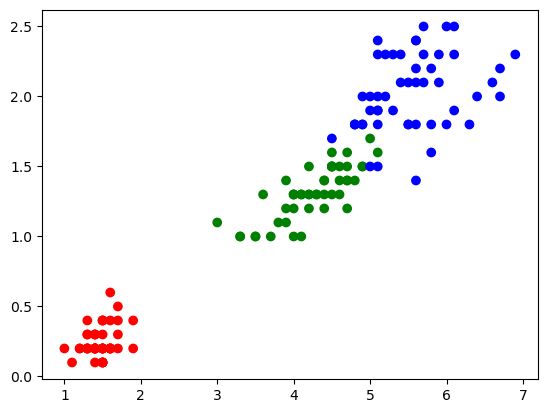

In [11]:
import matplotlib.pyplot as plt
petallength = data.petallength.values
petalwidth = data.petalwidth.values
types = data.species_num.values
color = [make_color(x) for x in types]
plt.scatter(petallength, petalwidth, color=color)
plt.show()

In [12]:
X = data.drop(['iris', 'species_num'], axis=1)
y = data.species_num

In [13]:
X.head()

,sepallength,sepalwidth,petallength,petalwidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species_num, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
K_list = []
acc_list = []
for K in range(1, int(y_train.shape[0]**0.5)): #/2
    K_list.append(K)
    clf = KNeighborsClassifier(n_neighbors=K)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    acc = accuracy_score(y_valid, y_pred)*100
    acc_list.append(acc)
    print(f"accuracy: {acc} % for K: ", K)
position = acc_list.index(max(acc_list))
k = K_list[position]
print('\nThe optimal number of neighbors is %d with %0.1f%%' % (k, acc_list[position]))

accuracy: 100.0 % for K:  1
accuracy: 100.0 % for K:  2
accuracy: 100.0 % for K:  3
accuracy: 100.0 % for K:  4
accuracy: 100.0 % for K:  5
accuracy: 100.0 % for K:  6
accuracy: 96.66666666666667 % for K:  7
accuracy: 100.0 % for K:  8
accuracy: 100.0 % for K:  9

The optimal number of neighbors is 1 with 100.0%


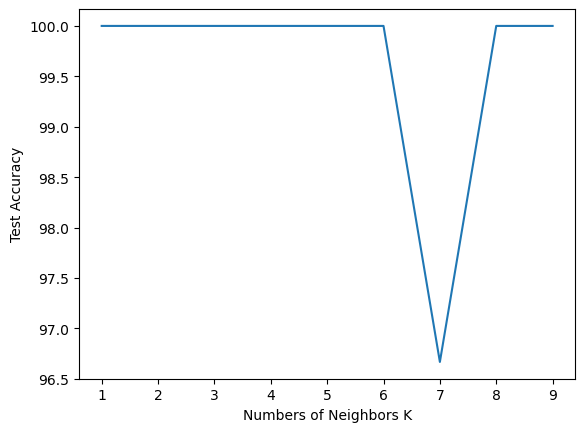

In [17]:
plt.plot(K_list, acc_list)
plt.xlabel('Numbers of Neighbors K')
plt.ylabel('Test Accuracy')
plt.show()

In [18]:
classifier = KNeighborsClassifier(n_neighbors=k)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_valid)

acc = accuracy_score(y_valid, y_pred)*100
print(f'accuracy: {acc} %')

accuracy: 100.0 %


In [19]:
df = pd.DataFrame({'Actual': pd.DataFrame(y_valid.values)[0].values,
                   'Prediction': pd.DataFrame(y_pred)[0].values})
df.head()

,Actual,Prediction
0,1,1
1,0,0
2,2,2
3,1,1
4,1,1


In [20]:
classifier.score(X_train, y_train)

1.0

In [21]:
classifier.score(X_valid, y_valid)

1.0

In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_valid, y_pred, labels=[0, 1])

array([[10,  0],
       [ 0,  9]])

In [23]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [24]:
# import pickle
# pkl_file = "pickle_classifier.pkl"
# with open(pkl_file, 'wb') as file:
#     pickle.dump(classifier, file)

In [25]:
# with open(pkl_file, 'rb') as file:
#     pickle_classifier = pickle.load(file)

In [26]:
X_check = [[4.8, 3.3, 1.6, 0.25]]
#y_result = pickle_classifier.predict(X_check)
y_result = classifier.predict(X_check)
y_result

array([0])

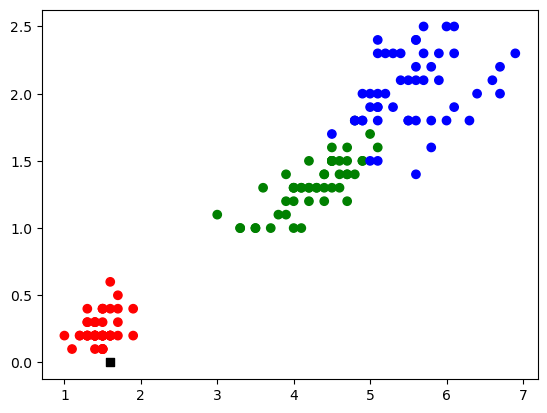

In [27]:
types = data.species_num.values
color = [make_color(x) for x in types]
plt.scatter(petallength, petalwidth, color=color)
plt.scatter(X_check[0][2], y_result, color='k', marker='s')
plt.show()